Problem 1

This code defines a function karatsuba that takes two integers x and y. It recursively splits these numbers into smaller parts and multiplies them using the Karatsuba algorithm. Finally, I've used your provided 64-digit numbers as a test case. The result should be the product of these two numbers

In [1]:
def karatsuba(x, y):
    # Base case for recursion
    if x < 10 and y < 10:  # single-digit numbers
        return x * y

    # Calculate the size of the numbers
    n = max(len(str(x)), len(str(y)))
    m = n // 2

    # Split the digit sequences in the middle
    x_high, x_low = divmod(x, 10**m)
    y_high, y_low = divmod(y, 10**m)

    # 3 calls made to numbers approximately half the size
    z0 = karatsuba(x_low, y_low)
    z1 = karatsuba((x_low + x_high), (y_low + y_high))
    z2 = karatsuba(x_high, y_high)

    return (z2 * 10**(2*m)) + ((z1 - z2 - z0) * 10**m) + z0

# Test with the provided 64-digit numbers
num1 = 3141592653589793238462643383279502884197169399375105820974944592
num2 = 2718281828459045235360287471352662497757247093699959574966967627

result = karatsuba(num1, num2)
print(result)


8539734222673567065463550869546574495034888535765114961879601127067743044893204848617875072216249073013374895871952806582723184


Problem 2

This script runs the Karatsuba algorithm on pairs of numbers with an increasing number of digits, records the time it takes to run the algorithm, and then plots the average and worst-case runtimes. Note the input sizes and the number of trials can be adjusted according to the requirements. The number of digits increases, the runtime will increase significantly due to the recursive nature of the Karatsuba algorithm.

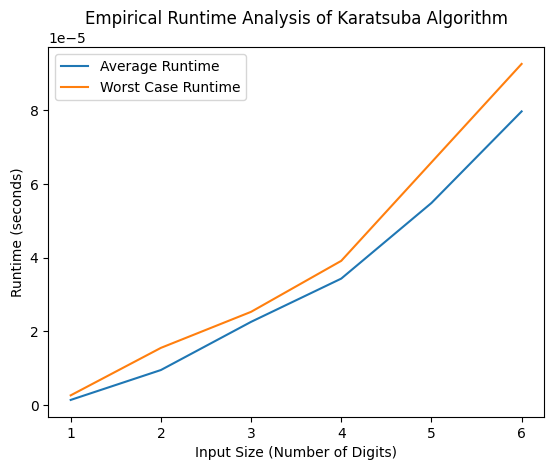

In [2]:
import time
import matplotlib.pyplot as plt
import random

# The Karatsuba algorithm as previously defined
def karatsuba(x, y):
    # Base case
    if x < 10 and y < 10:  # single-digit numbers
        return x * y

    n = max(len(str(x)), len(str(y)))
    m = n // 2

    x_high, x_low = divmod(x, 10**m)
    y_high, y_low = divmod(y, 10**m)

    z0 = karatsuba(x_low, y_low)
    z1 = karatsuba((x_low + x_high), (y_low + y_high))
    z2 = karatsuba(x_high, y_high)

    return (z2 * 10**(2*m)) + ((z1 - z2 - z0) * 10**m) + z0

# Function to generate a random number of n digits
def random_number(n):
    range_start = 10**(n-1)
    range_end = (10**n)-1
    return random.randint(range_start, range_end)

# Empirical run-time analysis
input_sizes = [i for i in range(1, 7)]  # 1 to 6 digit numbers
num_trials = 5
average_runtimes = []
worst_case_runtimes = []

for n in input_sizes:
    trial_runtimes = []
    for _ in range(num_trials):
        x = random_number(n)
        y = random_number(n)

        start_time = time.time()
        karatsuba(x, y)
        end_time = time.time()

        trial_runtimes.append(end_time - start_time)

    average_runtime = sum(trial_runtimes) / num_trials
    worst_case_runtime = max(trial_runtimes)

    average_runtimes.append(average_runtime)
    worst_case_runtimes.append(worst_case_runtime)

# Plotting the results
plt.plot(input_sizes, average_runtimes, label='Average Runtime')
plt.plot(input_sizes, worst_case_runtimes, label='Worst Case Runtime')
plt.xlabel('Input Size (Number of Digits)')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.title('Empirical Runtime Analysis of Karatsuba Algorithm')
plt.show()


Problem 4

To solve this problem efficiently, we can use a modified binary search algorithm. Since the array is sorted, binary search provides a divide and conquer approach that allows us to find the element, if it exists, in
Big O Notion O(logn) time.

Here's the algorithm:

1.Start with the entire array and find the middle element of the array at index
m.

2.If A[m]==m, then we've found an element for which A[i]=i. Return True.

3.If A[m]>m, then any index i for which A[i]=i must be to the left of m, since the elements to the right are greater than their indices (because the array is sorted with distinct integers).

4.If A[m]<m, then any index i for which A[i]=i must be to the right of m, since the elements to the left are less than their indices.

5.Recursively apply the algorithm to the subarray to the left or right as determined by steps 3 and 4.

6.If the subarray becomes empty, return False, indicating there is no such i that
A[i]=i.

In [3]:
def find_fixed_point(arr, start, end):
    if start > end:
        return False

    mid = start + (end - start) // 2

    # Check if the mid index is the fixed point
    if arr[mid] == mid:
        return True
    # If the mid element is greater than its index,
    # then the fixed point must be on the left side
    elif arr[mid] > mid:
        return find_fixed_point(arr, start, mid-1)
    # If the mid element is less than its index,
    # then the fixed point must be on the right side
    else:
        return find_fixed_point(arr, mid+1, end)

# The main function that initializes the search
def fixed_point(arr):
    return find_fixed_point(arr, 0, len(arr) - 1)

# Example usage:
# A sorted array with distinct integers
A = [-10, -5, 0, 3, 7, 9, 12, 13]
# Check if there is an index i such that A[i] = i
print(fixed_point(A))  # Outputs: True, since A[3] = 3


True
